# Important Header (Read First)

This is the EDA.ipynb file. This file is just where I did my exploration of the data and it sort of tracks my mental flow. 

If you want to look at my polished final project please start with Final.ipynb

### Data set \#1 Redlined Districts

https://dsl.richmond.edu/panorama/redlining/

In [1]:
import json, pandas as pd

In [2]:
with open('mappinginequality.json') as file:
    historic_data = json.load(file)

# type(historic_data) # confirmed it is a dict
historic_data.keys()

dict_keys(['type', 'features'])

There are a couple spots where I commented the code out and copied the couput as a markdown cell to keep this notebook from being absurdly long in github

In [3]:
# historic_data

{'type': 'FeatureCollection',   
 'features': [{'type': 'Feature',   
   'geometry': {'type': 'MultiPolygon', 
    'coordinates': [[[[-86.75678, 33.49754],    
       [-86.75653, 33.50176],   
       [-86.75724, 33.50179],   
       [-86.75813, 33.50088],   
       [-86.76032, 33.49846],   
       [-86.76046, 33.49818],   
       [-86.76065, 33.49731],   
       [-86.76146, 33.49581],   
       [-86.76208, 33.49529],   
       [-86.76246, 33.49489],   
       [-86.76246, 33.4945],    
       [-86.76184, 33.49402],   
       [-86.76122, 33.49402],   
       [-86.76113, 33.49371],   
       [-86.76194, 33.49264],   
       [-86.76336, 33.49172],   
       [-86.76479, 33.49089],   
       [-86.76588, 33.49057],   
       [-86.76664, 33.49006],   
       [-86.76735, 33.48931],   
       [-86.76897, 33.48839],   
       [-86.77111, 33.48697],   
... 
    'residential': True,    
    'commercial': False,    
    'industrial': False,    
    'fill': '#d9838d'}},    
  ...]}     
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

In [4]:
historic_data['type']

'FeatureCollection'

In [5]:
# historic_data['features']

[{'type': 'Feature',    
  'geometry': {'type': 'MultiPolygon',  
   'coordinates': [[[[-86.75678, 33.49754], 
      [-86.75653, 33.50176],    
      [-86.75724, 33.50179],    
      [-86.75813, 33.50088],    
      [-86.76032, 33.49846],    
      [-86.76046, 33.49818],    
      [-86.76065, 33.49731],    
      [-86.76146, 33.49581],    
      [-86.76208, 33.49529],    
      [-86.76246, 33.49489],    
      [-86.76246, 33.4945],   
      [-86.76184, 33.49402],    
      [-86.76122, 33.49402],    
      [-86.76113, 33.49371],    
      [-86.76194, 33.49264],    
      [-86.76336, 33.49172],    
      [-86.76479, 33.49089],    
      [-86.76588, 33.49057],    
      [-86.76664, 33.49006],    
      [-86.76735, 33.48931],    
      [-86.76897, 33.48839],    
      [-86.77111, 33.48697],    
      [-86.77168, 33.48617],    
...   
   'residential': True,     
   'commercial': False,   
   'industrial': False,   
   'fill': '#d9838d'}},   
 ...]   
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

So from this json file it is type FeatureCollection but all the data is stored in ['features']

In [6]:
# historic_data['features'][0]

{'type': 'Feature',     
 'geometry': {'type': 'MultiPolygon',   
  'coordinates': [[[[-86.75678, 33.49754],  
     [-86.75653, 33.50176],     
     [-86.75724, 33.50179],     
     [-86.75813, 33.50088],     
     [-86.76032, 33.49846],     
     [-86.76046, 33.49818],     
     [-86.76065, 33.49731],     
     [-86.76146, 33.49581],     
     [-86.76208, 33.49529],     
     [-86.76246, 33.49489],     
     [-86.76246, 33.4945],      
     [-86.76184, 33.49402],     
     [-86.76122, 33.49402],     
     [-86.76113, 33.49371],     
     [-86.76194, 33.49264],     
     [-86.76336, 33.49172],     
     [-86.76479, 33.49089],     
     [-86.76588, 33.49057],     
     [-86.76664, 33.49006],     
     [-86.76735, 33.48931],     
     [-86.76897, 33.48839],     
     [-86.77111, 33.48697],     
     [-86.77168, 33.48617],     
...     
  'label': 'A1',    
  'residential': True,  
  'commercial': False,  
  'industrial': False,  
  'fill': '#76a865'}}   
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

So this has solid geo data in ['coordinates'] and actual geo properties in ['properties']

In [7]:
for i in range(5):
    print(historic_data['features'][i]['properties'])

{'area_id': 244, 'city': 'Birmingham', 'state': 'AL', 'city_survey': True, 'category': 'Best', 'grade': 'A', 'label': 'A1', 'residential': True, 'commercial': False, 'industrial': False, 'fill': '#76a865'}
{'area_id': 193, 'city': 'Birmingham', 'state': 'AL', 'city_survey': True, 'category': 'Best', 'grade': 'A', 'label': 'A2', 'residential': True, 'commercial': False, 'industrial': False, 'fill': '#76a865'}
{'area_id': 206, 'city': 'Birmingham', 'state': 'AL', 'city_survey': True, 'category': 'Best', 'grade': 'A', 'label': 'A3', 'residential': True, 'commercial': False, 'industrial': False, 'fill': '#76a865'}
{'area_id': 203, 'city': 'Birmingham', 'state': 'AL', 'city_survey': True, 'category': 'Still Desirable', 'grade': 'B', 'label': 'B1', 'residential': True, 'commercial': False, 'industrial': False, 'fill': '#7cb5bd'}
{'area_id': 189, 'city': 'Birmingham', 'state': 'AL', 'city_survey': True, 'category': 'Still Desirable', 'grade': 'B', 'label': 'B10', 'residential': True, 'commerc

We can use ['properties']['city'] to get denver

In [8]:
denver_historic_data = []

for feature in historic_data['features']:
    if feature['properties']['city'] == 'Denver':
        denver_historic_data.append(feature)

denver_historic_data[:3]

[{'type': 'Feature',
  'geometry': {'type': 'MultiPolygon',
   'coordinates': [[[[-104.90814, 39.74754],
      [-104.91246, 39.74749],
      [-104.91252, 39.75105],
      [-104.91741, 39.75108],
      [-104.91737, 39.74848],
      [-104.92224, 39.7485],
      [-104.92222, 39.74817],
      [-104.92811, 39.74822],
      [-104.92923, 39.74823],
      [-104.92919, 39.74701],
      [-104.9271, 39.74701],
      [-104.9271, 39.74469],
      [-104.92908, 39.74473],
      [-104.93189, 39.74469],
      [-104.93197, 39.7433],
      [-104.92927, 39.74334],
      [-104.92833, 39.74339],
      [-104.92708, 39.7433],
      [-104.92706, 39.74199],
      [-104.92468, 39.74199],
      [-104.92462, 39.74082],
      [-104.92028, 39.74073],
      [-104.91509, 39.74077],
      [-104.9141, 39.74077],
      [-104.91407, 39.73853],
      [-104.91398, 39.72919],
      [-104.91288, 39.72921],
      [-104.9125, 39.72919],
      [-104.91259, 39.74092],
      [-104.90824, 39.74097],
      [-104.90814, 39.74754]]]]}

I was looking up the differences between JSON and GEOJSON and found a helpful resource. geopandas is apparently great at understanding GEOJSON geometry so lets try some EDA with it and see what we get

This was before we talked about it in class :(

In [9]:
# pip install geopandas

In [10]:
import geopandas as gdp

denver_gdf = gdp.GeoDataFrame.from_features(denver_historic_data)
denver_gdf.head()

,geometry,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill
0,"MULTIPOLYGON (((-104.90814 39.74754, -104.9124...",6525,Denver,CO,True,Best,A,A1,True,False,False,#76a865
1,"MULTIPOLYGON (((-104.92221 39.73851, -104.9222...",6529,Denver,CO,True,Best,A,A2,True,False,False,#76a865
2,"MULTIPOLYGON (((-104.91281 39.72538, -104.9128...",6537,Denver,CO,True,Best,A,A3,True,False,False,#76a865
3,"MULTIPOLYGON (((-104.96016 39.72913, -104.9601...",6536,Denver,CO,True,Best,A,A4,True,False,False,#76a865
4,"MULTIPOLYGON (((-104.95956 39.72366, -104.9595...",6540,Denver,CO,True,Best,A,A5,True,False,False,#76a865


In [11]:
denver_gdf["city"].value_counts() #just to double check

city
Denver    56
Name: count, dtype: int64

In [12]:
denver_gdf["grade"].value_counts()

grade
C    20
D    16
B    12
A     6
Name: count, dtype: int64

crunching these numbers there are two rows with no grades, these will be discarded

In [13]:
denver_gdf.loc[denver_gdf["grade"] == "D"]

,geometry,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill
38,"MULTIPOLYGON (((-104.88487 39.74318, -104.8848...",6522,Denver,CO,True,Hazardous,D,D1,True,False,False,#d9838d
39,"MULTIPOLYGON (((-105.00536 39.76194, -105.0020...",6568,Denver,CO,True,Hazardous,D,D10,True,False,False,#d9838d
40,"MULTIPOLYGON (((-104.99513 39.76131, -104.9972...",6555,Denver,CO,True,Hazardous,D,D11,True,False,False,#d9838d
41,"MULTIPOLYGON (((-104.96475 39.76814, -104.9648...",6531,Denver,CO,True,Hazardous,D,D12,True,False,False,#d9838d
42,"MULTIPOLYGON (((-104.96472 39.7644, -104.96594...",6532,Denver,CO,True,Hazardous,D,D13,True,False,False,#d9838d
43,"MULTIPOLYGON (((-104.97321 39.79092, -104.9896...",6557,Denver,CO,True,Hazardous,D,D14,True,False,False,#d9838d
44,"MULTIPOLYGON (((-104.95454 39.78368, -104.9713...",6556,Denver,CO,True,Hazardous,D,D15,True,False,False,#d9838d
45,"MULTIPOLYGON (((-104.95454 39.78368, -104.9507...",6553,Denver,CO,True,Hazardous,D,D16,True,False,False,#d9838d
46,"MULTIPOLYGON (((-104.94065 39.71942, -104.9562...",6538,Denver,CO,True,Hazardous,D,D2,True,False,False,#d9838d
47,"MULTIPOLYGON (((-104.99823 39.67234, -104.9983...",6548,Denver,CO,True,Hazardous,D,D3,True,False,False,#d9838d


This visualization is a good check to make sure the data works good but its also interesting to see the number of grades across the board with white flight and the 

<Axes: xlabel='grade'>

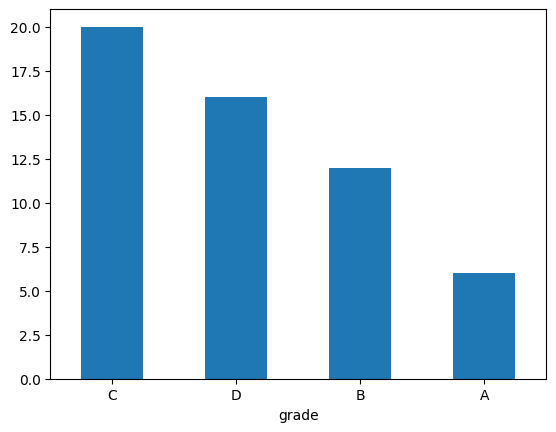

In [14]:
# using 'rot' inside the pandas .plot rotates the xlables bc for some reason they defaulted to being sideways
denver_gdf["grade"].value_counts().plot(kind="bar",rot=0)

<Axes: >

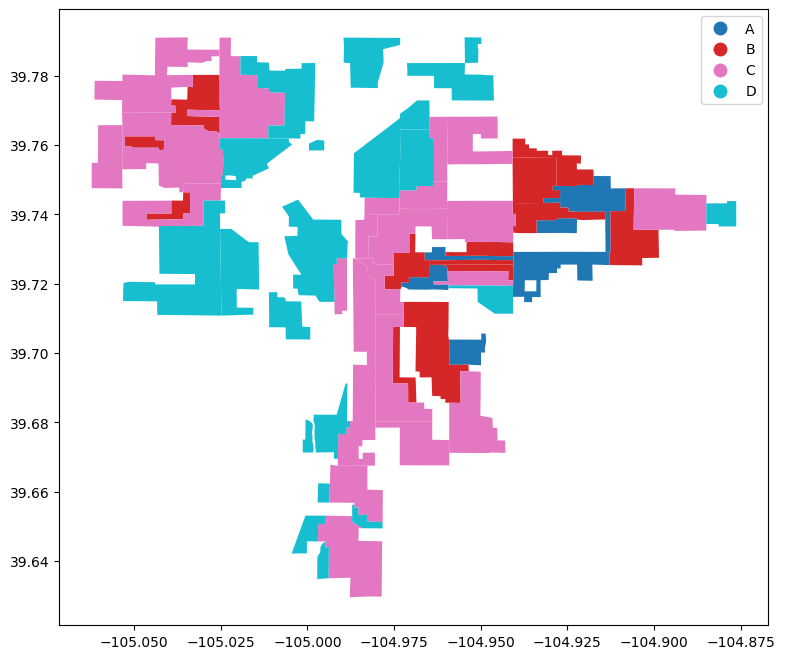

In [15]:
# First attempt at plotting the data
denver_gdf.plot(column="grade", legend=True, figsize=(10, 8))

I started this project before we looked at geopandas in class and I tried to use .explore but I was having "trust" issues with it so I needed to find a work around. 

This is super swag but I want to make this make sense to the average viewer so they can see this data plotted over a map of denver. I have looked into this a little bit because I know there are a million libraries to help plot real maps but I think the one I am specifically looking for is a library called contextily.

Contextily looks like it is designed specifically to provide real world context for python geo maps

https://contextily.readthedocs.io/en/latest/intro_guide.html

This is the documentation I am following

"""     
Welcome to the taster guide for contextily, the package for contextual tiles in Python. In this notebook, we will show the basic functionality available in contextily, a package to work with web-tiles for background maps. To do that, we will use additional data to illustrate contextily can be integrated with other libraries such as geopandas and rasterio.   
"""

In [16]:
# %pip install contextily

Since I am going to be learning this part as we go I am pretty much going to document every few lines

starting with a very simple import block containing contextily and whatever else I find I need

In [17]:
import matplotlib.pyplot as plt
import contextily as cx

Next. Denver_gdf is a geopandas.geodataframe.GeoDataFrame object which means it has a few helpful methods and attributes we will need to check starting with crs and bounds.

crs stands for Coordinate Reference System which is essentially just teh time standard thing we have talked about earlier in this class but for coordinates. GeoJSON is usually EPSG:4326 (longitude, latitude in degrees[a modern global coordinate system that handles earth as an ellipsoid]) so we need to verify that this is the case and if it is not we will need to update the crs

In [18]:
type(denver_gdf)

geopandas.geodataframe.GeoDataFrame

In [19]:
print(denver_gdf.crs)

None


womp womp

In [20]:
denver_gdf = denver_gdf.set_crs('EPSG:4326')
print(denver_gdf.crs)

EPSG:4326


And the total bounds (another attribute) "total_bounds returns [minx, miny, maxx, maxy]"

Denver is centered around   
Latitude	39.742043   
Longitude	-104.991531

So I am hoping for something that roughly encompases that area within a few degrees

In [21]:
denver_gdf.total_bounds

array([-105.06225,   39.62952, -104.87626,   39.79111])

This looks good to me & means I dont have to reset it!

This is the part where things get a little more confusing. Apparently Contextily basemaps (which is what is used in the documentation) use EPSG 3857 which is "Web Mercator projection" widely used in online mapping platforms but is a flat coordinate representation (does not handel the earht as an ellipsoid).

So what we need to do is make a copy of the denver_gdf transforming the coordinates from ESPG 4326 to ESPG 3857

This is the step that lines up the contextily map with our districts map above

In [22]:
denver_gdf_3857 = denver_gdf.to_crs(epsg=3857)

From here it is just a matter of plotting the contextily map and our district plot from above. Looking at a quick resource from a google search

https://matplotlib.org/stable/users/explain/axes/axes_intro.html

The convention for plots is to use ax when assigning a matplotlib plot object and similarly for a contextily plot object we use cx. Just a fun fact!

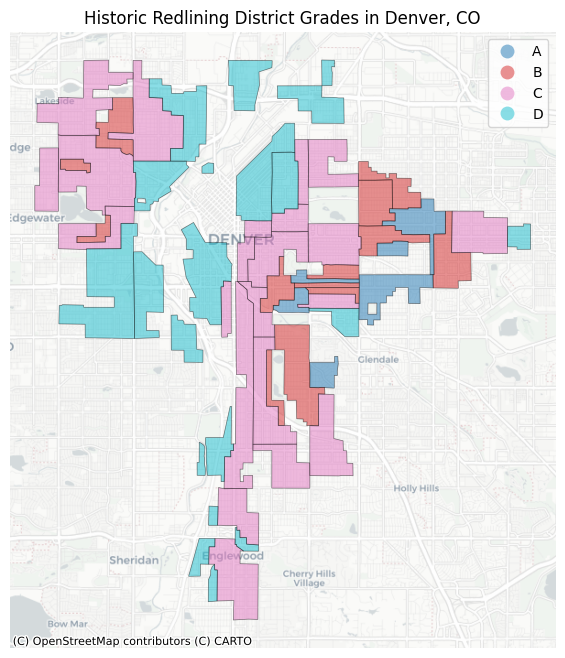

In [23]:
ax = denver_gdf_3857.plot(
    column="grade", 
    legend=True, 
    figsize=(8, 8), 
    alpha=0.5,
    edgecolor="black",
    linewidth=0.5
)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
ax.axis('off') # turned off the axis because it was just nonsense numbers in web mercator
plt.title("Historic Redlining District Grades in Denver, CO")
plt.show()

Now this is a small thing but I do care about the users experience in this so I looked up matplotlibs documentation on how to change colors and it looks like I can change this to a catigorical plot and use a matplotlib library to make a color map of teh categories to colors then use those colors to fill.

https://matplotlib.org/stable/gallery/color/named_colors.html

I will also be using this accessable red-orange-yellow-green color pallet from colorany.com

https://colorany.com/color-palettes/contrasting-green-yellow-orange-and-red-color-palettes/

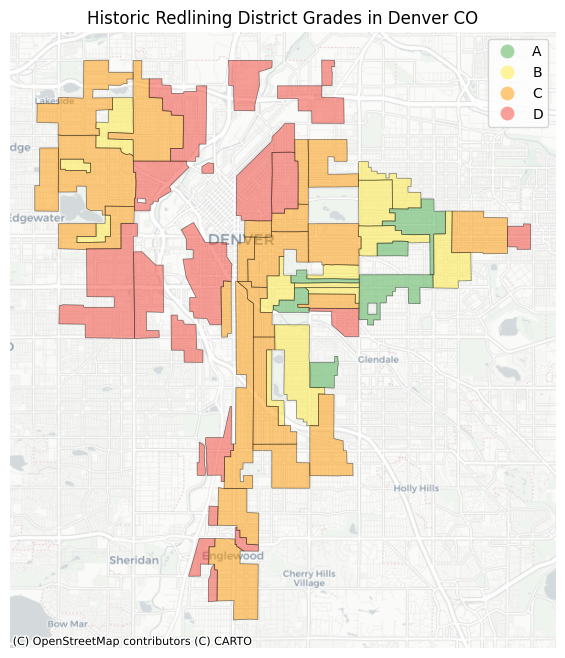

In [24]:
import matplotlib.colors as mcolors

grade_categories = ["A", "B", "C", "D"]
grade_colors = ["#4CAF50", "#FFEB3B", "#FF9800", "#F44336"]

color_map = mcolors.ListedColormap(grade_colors)


ax = denver_gdf_3857.plot(
    column="grade", 
    cmap=color_map,
    categorical=True,
    categories=grade_categories,
    legend=True, 
    figsize=(8, 8), 
    alpha=0.5,
    edgecolor="black",
    linewidth=0.5
)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
ax.axis('off') # turned off the axis because it was just nonsense numbers in web mercator
plt.title("Historic Redlining District Grades in Denver CO")
plt.show()

OOOOOOOWEEEEEEEE THis is starting to come together. Side note: I love the EDA part of this because I get to be informal and slip conversational comments into these sections lowk similar to what I do for my homework assignments. I will lock in for the Actual final deliverable though. It will be so serious and important.

But alas I have spent way too much time on this one graph so lets move onto the next part of this project with data set number 2!

-------
So this is really funny, In class we just did a geopandas example using .explore() I had initially gotten an error about trust permissions I could not get around so I dropped it and thats what led me to contextily. Sitting in class realizing I literally could not do what we were talking about unless I figured out how to trust my noetbook I locked in

The error was I needed to trust my notebook but VS Code has no good built in way to do that for .ipynb files (especially ssince VS Code trust and jupyter notebook trust is different) after a few failed attempts in the command pallett and preference settings I figured out how to open the file in the text editor and manually add "trusted":true to the meta data which would trust the notebook. 

This is not the best fix since if you restart the notebook it still acts a fool but this is a good work around so I will do a little geopandas exploration.

In [25]:
denver_gdf.explore()

This makes the fan SPIN in my laptop but this is WAY easier and intrinsically interactive so while I will leave my previous work alone since it took me a long time to do it I am going to move forward and re-work the rest of my project to just use this now that my notebook is mostly trusted (lie, read footnote under next cell).

In [26]:
denver_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
color_map = mcolors.ListedColormap(grade_colors)

# this is so dumb but geopandas (more specifically leaflet) expects the data to be in crs 4326
# just so internally it can project it into a standardized 3857
denver_redline_map = denver_gdf.explore(
    column="grade",
    categorical=True,
    categories=grade_categories,
    cmap=color_map,
    legend=True,
    tiles="CartoDB positron", #I can use the same base map I was using with contextily
    style_kwds={"fillOpacity": 0.6, "weight": 0.6},
    tooltip=["grade","category"]
)
denver_redline_map.save("denver_redline_map.html")
denver_redline_map


This is really cool and all but I think this is important to be known. My VS Code HATES geopandas .explore I have been working with this for the past few hours going into the meta data and editing things trying to trust the notebook. Updating my VS Code and altering settings to help the native jupyter display all because For whatever reason VS Code just picks and chooses when to load the map? Or sometimes it will load only chunks of it? I think I have it in a semi stable working version but scratch what I said before about only using geopandas.explore because it is unreliable. I will predominately be using contextily moving forward but where I can I will also try to make interactive maps as fun backups.

I think the issue really starts when I try to start applying my own zoom settings to the map like zoom_start, min zoom, centering, height adjustments or any sort of padding. This leads to (in my opinion) an uglier visual that is annoying to zoom in and out on and only displays very basic information (for fear of it not working otherwise)

------

### Data set \#2 US Census Data

Funnily enough I have to start this section off by explaining- When thinking about this part of the project I specifically wanted to mesh current Socioeconomic & housing data with teh historic redline data to see long term effects of redlining.

I knew something existed that was a US survey of general economic feelings in the US which I thought was a part of the census but as it turns out we are looking for 'The American Community Survey' both come from the Census Bureau but the actual Census itself is a "'Snapshot' taken every 10 years to distribute political power. The American Community Survey is a continuous 'moving video,' capturing the detailed social and economic portrait of the nation year after year." (govfacts.org)

https://govfacts.org/federal/commerce/census/the-census-vs-the-american-community-survey/

So what the American Community Survey (ACS) is, is a long form survey designed to capture the social, economic, housing, and demographic data from year to year.

Exploring the American Community Survey website they have a data tab and in that data tab they have a whole section for their API useage. We will be using their provided API because otherwise we would have to download and deal with a huge data load on my local machine and because this project requires we use at least two different structural types. 

https://www.census.gov/programs-surveys/acs/data/data-via-api.html

In order to work with the ACS API we need to request an API key, this creqtes a unique challenge for us since I am posting this whole project on github and it is generall unwise to post a unique API key publicly. So I will make a .env file to store my API Key then throw the .env file into a .gitignore

Now to use the API Key I will import load_dotenv and os to load the api key variable then store it as a local useable variable 

https://mikekipruto.substack.com/p/how-to-store-api-keys-securely-in

In [28]:
# %pip install python-dotenv

In [29]:
import os
from dotenv import load_dotenv
load_dotenv()

api_key = os.getenv("API_KEY")

Theoretically this should work but since I cant print or show the API key we will have to move on to utalizing it

"""     
To create an API call, you must enter a specific URL into the address bar of a web browser. The call will vary depending on the following factors:

Year of data release

Dataset (ACS 1-year or 5-year) 

Table ID

Geography level    

Example Call: api.census.gov/data/2024/acs/acs1?get=NAME,group(B01001)&for=us:1&key=YOUR_KEY_GOES_HERE

2024 ACS Detailed Tables Variables [ html | xml | json ]

ACS Technical Documentation

Examples and Supported Geography    
"""

In [30]:
import requests

In [31]:
# need to figure out which request I want to make

In [32]:
class CensusAPIrequester:
    def __init__(self, year):
        self.year = year
        self.base_url = f"https://api.census.gov/data/{self.year}/acs/acs5"

    def get_api_groups(self):
        request = requests.get(self.base_url + "/groups.json")
        census_groups = request.json()
        return census_groups
    
    def get_api_group(self, group_code):
        request = requests.get(self.base_url + f"/groups/{group_code}.json")
        group = request.json()
        return group
    
    def get_group_variable(self, group_code, variable_code):
        variable = self.get_api_group(group_code)["variables"][variable_code]
        return variable
    
    # Above code is more for the exploratory side of things
    def get_data(self, variables, state="08", county="031", api_key=api_key):
        var_string = ",".join(variables)
        url = f"{self.base_url}?get={var_string}&for=tract:*&in=state:{state}+county:{county}&key={api_key}"
        response = requests.get(url)
        data = response.json()
        df = pd.DataFrame(data[1:], columns=data[0])
        return df


In [33]:
CensusObject = CensusAPIrequester(2023) #2024 data not out yet

In [34]:
#CensusObject.get_api_groups()
# I found that there were group codes that started with B19013 for specific ethnic groups
# But when I tried to look them up with an endpoint and it returned different groups?
# But at the same time the endpoint groups look more helpful and broad

# Group code B19013... is for "Median Household Income in the Past 12 Months"
# Variable code B19013_001E is specifically for Estimate!!Median household income in the past 12 months (in 2023 inflation-adjusted dollars)

#CensusObject.get_api_group("B19013")
CensusObject.get_group_variable("B19013","B19013_001E")


{'label': 'Estimate!!Median household income in the past 12 months (in 2023 inflation-adjusted dollars)',
 'concept': 'Median Household Income in the Past 12 Months (in 2023 Inflation-Adjusted Dollars)',
 'predicateType': 'int',
 'group': 'B19013',
 'limit': 0,
 'predicateOnly': True,
 'universe': 'Households'}

Suggestions from my peers
Include:
- school ratings
- crime statistics

I think these are great ideas but after talking with my TA we believe these to be out of scope. I would love to deepen this project and pull additional metrics from the census data but for all intents and purpouses I need to stick to the mdeian household income.

In [35]:
census_data = CensusObject.get_data(variables=["B19013_001E"])
census_data = census_data.rename(columns={"B19013_001E":"median_income"})
census_data.head()

,median_income,state,county,tract
0,158906,08,031,000102
1,92237,08,031,000201
2,92621,08,031,000202
3,132875,08,031,000301
4,127554,08,031,000302


------------
## Dataset 3

Topologically Integrated Geographic Encoding and Referencing    
Also from the US Census

aka "Tiger"

In [36]:
tiger_url = "https://www2.census.gov/geo/tiger/TIGER2023/TRACT/tl_2023_08_tract.zip"
tracts = gdp.read_file(tiger_url)

display(tracts.head())

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,08,041,002300,08041002300,1400000US08041002300,23,Census Tract 23,G5020,S,3129892,0,+38.8273607,-104.8263328,"POLYGON ((-104.83615 38.82299, -104.83598 38.8..."
1,08,041,006600,08041006600,1400000US08041006600,66,Census Tract 66,G5020,S,2516901,91797,+38.8687188,-104.8744389,"POLYGON ((-104.88195 38.8566, -104.8819 38.856..."
2,08,041,006100,08041006100,1400000US08041006100,61,Census Tract 61,G5020,S,1355660,0,+38.8327720,-104.7524816,"POLYGON ((-104.75752 38.83876, -104.75751 38.8..."
3,08,041,006200,08041006200,1400000US08041006200,62,Census Tract 62,G5020,S,3609651,0,+38.8323139,-104.7346290,"POLYGON ((-104.74872 38.8261, -104.74869 38.82..."
4,08,035,014300,08035014300,1400000US08035014300,143,Census Tract 143,G5020,S,492002471,1693504,+39.2547440,-105.1569731,"POLYGON ((-105.32922 39.12969, -105.32915 39.1..."


This GEOID is what will be important to us since the GEOID is made up of state + county + tract (which are all things we have from our last dataset)

In [37]:
tracts = tracts.loc[tracts["COUNTYFP"] == "031"].copy() # 031 is Denver County

display(tracts[["GEOID","NAME"]].head())

,GEOID,NAME
212,08031002101,21.01
271,08031004404,44.04
272,08031004403,44.03
300,08031003701,37.01
301,08031003702,37.02


In [38]:
tracts.crs   # EPSG:4269 (NAD83) (North American Datum 1983)

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [39]:
census_data_to_merge = census_data.copy()

census_data_to_merge["GEOID"] = census_data_to_merge["state"] + census_data_to_merge["county"] + census_data_to_merge["tract"]
census_data_to_merge.head()

,median_income,state,county,tract,GEOID
0,158906,08,031,000102,08031000102
1,92237,08,031,000201,08031000201
2,92621,08,031,000202,08031000202
3,132875,08,031,000301,08031000301
4,127554,08,031,000302,08031000302


In [40]:
census_merged = tracts.merge(census_data_to_merge[["GEOID","median_income"]], on="GEOID", how="left")

census_merged["median_income"] = pd.to_numeric(census_merged["median_income"]) #was freaking out since it auto cast to string

print(len(tracts), len(census_data_to_merge), len(census_merged)) #should all be the same


178 178 178


In [41]:
min_income = census_merged["median_income"].min()
print(min_income)
# The min value was listed as -666666666 which actually reminds me I need to check this data for outliers
max_income = census_merged["median_income"].max()
print(max_income)

-666666666
250001


<Axes: >

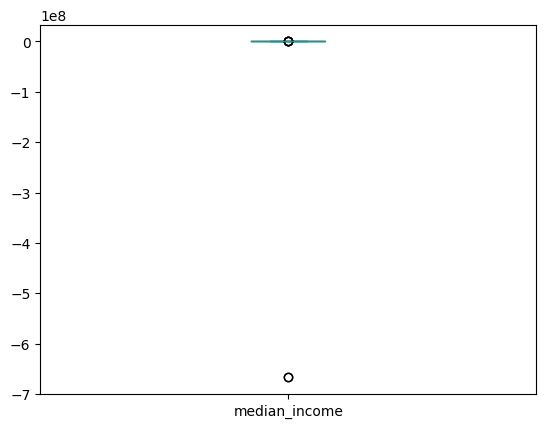

In [42]:
census_merged["median_income"].plot(
    kind="box"
)

This is good since this tells us that it appears that the one huge outlier is heavily affecting our data

There is another outlier above 200,000 but I opted to leave it in since I think it helps better represents the data

In [43]:
census_merged = census_merged.loc[census_merged["median_income"] >= 0]
#census_merged = census_merged.loc[census_merged["median_income"] <= 200000] 

<Axes: >

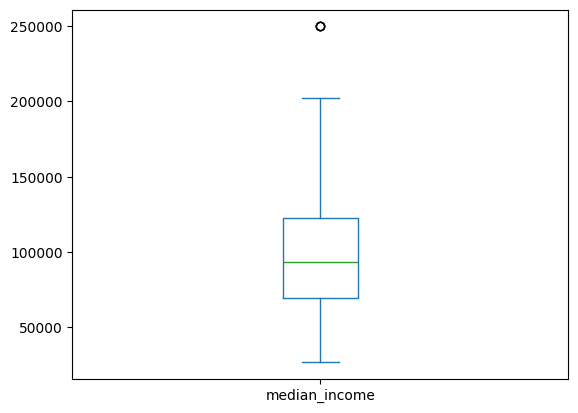

In [44]:
census_merged["median_income"].plot(
    kind="box"
)

In [45]:
min_income = census_merged["median_income"].min()
print(min_income)
max_income = census_merged["median_income"].max()
print(max_income)

26462
250001


In [46]:
census_merged.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [47]:
census_merged_3875 = census_merged.to_crs(3857)  # from 4269 to 3857 (in order to map)

I've used this in homeworks before but to make this plot show up nicely I am going to use subplots to help the sizing. This is a little confusing but the documentation helps

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

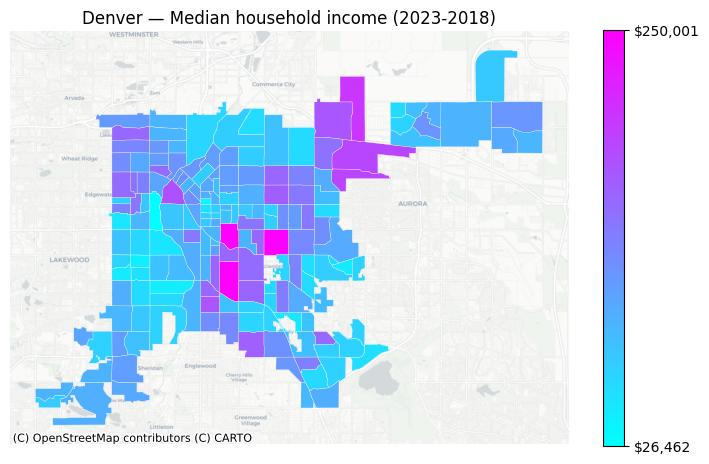

In [48]:
fig, ax = plt.subplots(figsize=(9,9))
census_merged_3875.plot(column="median_income",
       cmap="cool", 
       legend=True,
       legend_kwds={
              'ticks': [min_income, max_income], # Set ticks to only min and max to avoid crowding
              'format': '${x:,.0f}', # format as currency
              'shrink': 0.6
       },
       linewidth=0.2,
       edgecolor="white",
       ax=ax
       )

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zoom=12)
ax.set_title("Denver — Median household income (2023-2018)")
ax.set_axis_off()
plt.show()

-------------

## Putting it all together

In [49]:
# Sanity check 
# This is dumb buts its always good to double check
print(denver_gdf.crs)
print(denver_gdf_3857.crs)
print()
print(census_merged.crs)
print(census_merged_3875.crs)

EPSG:4326
EPSG:3857

EPSG:4269
EPSG:3857


In [50]:
holc = denver_gdf_3857.copy()
tracts = census_merged_3875.copy()

In [51]:
holc.head()

,geometry,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill
0,"MULTIPOLYGON (((-11678320.725 4829323.016, -11...",6525,Denver,CO,True,Best,A,A1,True,False,False,#76a865
1,"MULTIPOLYGON (((-11679886.99 4828015.708, -116...",6529,Denver,CO,True,Best,A,A2,True,False,False,#76a865
2,"MULTIPOLYGON (((-11678840.587 4826115.132, -11...",6537,Denver,CO,True,Best,A,A3,True,False,False,#76a865
3,"MULTIPOLYGON (((-11684111.565 4826657.91, -116...",6536,Denver,CO,True,Best,A,A4,True,False,False,#76a865
4,"MULTIPOLYGON (((-11684044.773 4825866.188, -11...",6540,Denver,CO,True,Best,A,A5,True,False,False,#76a865


In [52]:
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,median_income
0,08,031,002101,08031002101,1400000US08031002101,21.01,Census Tract 21.01,G5020,S,880925,0,+39.7220354,-104.9938290,"POLYGON ((-11688567.461 4825932.766, -11688563...",143581
1,08,031,004404,08031004404,1400000US08031004404,44.04,Census Tract 44.04,G5020,S,1304208,0,+39.7365094,-104.8940558,"POLYGON ((-11677799.972 4828085.05, -11677799....",58204
2,08,031,004403,08031004403,1400000US08031004403,44.03,Census Tract 44.03,G5020,S,1465389,0,+39.7443925,-104.8948130,"POLYGON ((-11677800.084 4829044.167, -11677799...",85336
3,08,031,003701,08031003701,1400000US08031003701,37.01,Census Tract 37.01,G5020,S,1873267,120383,+39.7444161,-104.9509827,"POLYGON ((-11684070.154 4828984.084, -11684069...",96746
4,08,031,003702,08031003702,1400000US08031003702,37.02,Census Tract 37.02,G5020,S,706200,0,+39.7365218,-104.9543646,"POLYGON ((-11684070.711 4827513.533, -11684070...",76028


La Piece de Resistance for this project is going to be a spatial merge from the old holc data and the 2023 Census data

How spatial joins work is they join two geodatasets (similar to normal joins) but instead of joining on a common trait spatial joins use a predicate to find the relation between datasets (touch, intersect, etc)

In [53]:
# Again double checking bc if the crs is off everything gets obliterated
print(holc.crs)
print(tracts.crs)

EPSG:3857
EPSG:3857


This is one of those things where juyter notebooks cant always be linear so I am going to offer a quick explanation because in the next cell you might be asking yourself, "Why am I copying a column and naming only a slightly different name?"

That's a great question, you're so smart. So when doing the normal spatial join it looks at overlapping geometries and created a row if there is overlap. looking at the data after the fact the new df only keeps the geometry from the tracts data as the "Geometry" column and disregards the other.

Generally this is no big deal but I had big glorious hopes of doing crazy tricks on this data so I need both the tracts geometry and holc geometry data. 

Its a secret right now but I'll explain why I need both later (get hype)

In [54]:
holc["holc_geom"] = holc["geometry"]

In [55]:
joined = gdp.sjoin(
    tracts, #left
    holc[["grade", "geometry", "holc_geom"]], #right. Only add grade and geomotry to tracts data
    how="inner",
    predicate="intersects",
)

# above is all we really need for the join
# below is where we start doing tricks on it

joined['intersection_geometry'] = joined['geometry'].intersection(joined['holc_geom'])
joined['area_overlapped'] = joined['intersection_geometry'].area
joined = joined.drop(columns=['intersection_geometry', 'holc_geom'])
joined.head()


,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,median_income,index_right,grade,area_overlapped
0,08,031,002101,08031002101,1400000US08031002101,21.01,Census Tract 21.01,G5020,S,880925,0,+39.7220354,-104.9938290,"POLYGON ((-11688567.461 4825932.766, -11688563...",143581,19,C,443851.111573
0,08,031,002101,08031002101,1400000US08031002101,21.01,Census Tract 21.01,G5020,S,880925,0,+39.7220354,-104.9938290,"POLYGON ((-11688567.461 4825932.766, -11688563...",143581,54,None,128503.559644
0,08,031,002101,08031002101,1400000US08031002101,21.01,Census Tract 21.01,G5020,S,880925,0,+39.7220354,-104.9938290,"POLYGON ((-11688567.461 4825932.766, -11688563...",143581,50,D,918562.707475
1,08,031,004404,08031004404,1400000US08031004404,44.04,Census Tract 44.04,G5020,S,1304208,0,+39.7365094,-104.8940558,"POLYGON ((-11677799.972 4828085.05, -11677799....",58204,12,B,206945.277203
1,08,031,004404,08031004404,1400000US08031004404,44.04,Census Tract 44.04,G5020,S,1304208,0,+39.7365094,-104.8940558,"POLYGON ((-11677799.972 4828085.05, -11677799....",58204,38,D,11127.152637


So what just happened there is when the sjoin happens it calculates the overlap but doesnt store that (and that is a hard feat to get it to store somewhere) So I made a new column that calculates the area of overlap for each row.

The reason this is important is because there are a lot of areas on the map below that are "technically" overlapping but are really more just boardering eachother and I think it would be unrepresentative of the data if we include those counties in our future calculations since realistically there is no real overlap between the historic data and the current data.

This is skipping ahead a little but this screenshot below shows an example of what I mean. The red outline is the redline data and the blue districts are from the census data. In our df these were counted as overlap and were affecting the results of our experimentation so I went through and dropped districts that didnt meet a minimum area_overlapped threshold

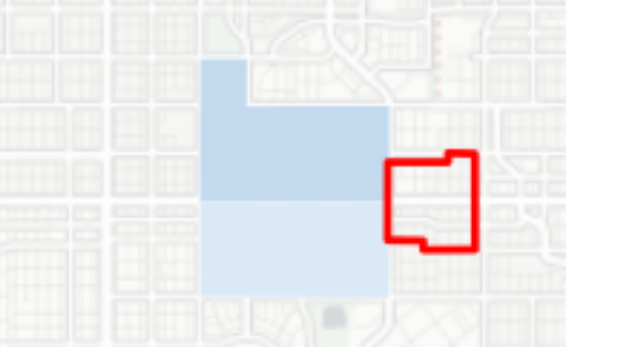

In [56]:
from IPython import display
display.Image("./bad_example.png")

<Axes: >

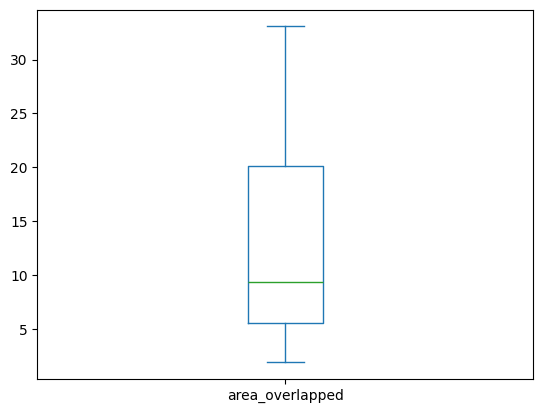

In [57]:
smallest_overlaps = joined.sort_values(by='area_overlapped', ascending=True)[:10]
smallest_overlaps["area_overlapped"].plot(
    kind="box"
)

I also want to visualize specifically smallest redline district overlap

<Axes: >

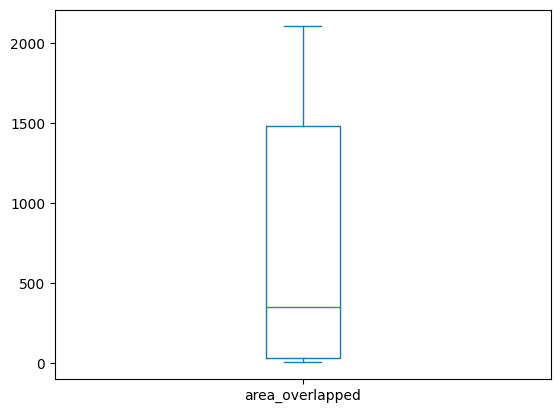

In [58]:
smallest_redline_overlaps = joined.loc[joined["grade"]=='D'].sort_values(by='area_overlapped', ascending=True)[:10]
smallest_redline_overlaps["area_overlapped"].plot(
    kind="box"
)

In [59]:
joined.loc[(joined["area_overlapped"]<=3000) & (joined["grade"]=='D')]

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,median_income,index_right,grade,area_overlapped
16,08,031,001705,08031001705,1400000US08031001705,17.05,Census Tract 17.05,G5020,S,377140,0,+39.7544510,-105.0011626,"POLYGON ((-11689218.903 4829980.934, -11689200...",123452,40,D,5.498941
25,08,031,002102,08031002102,1400000US08031002102,21.02,Census Tract 21.02,G5020,S,2977258,0,+39.7131837,-104.9968922,"POLYGON ((-11690309.611 4826042.764, -11690309...",98073,49,D,15.503766
62,08,031,000404,08031000404,1400000US08031000404,4.04,Census Tract 4.04,G5020,S,683430,0,+39.7594062,-105.0169781,"POLYGON ((-11691356.349 4831419.845, -11691319...",156198,39,D,109.985254
80,08,031,003203,08031003203,1400000US08031003203,32.03,Census Tract 32.03,G5020,S,1683151,0,+39.7222971,-104.9659994,"POLYGON ((-11685571.075 4825149.061, -11685568...",250001,46,D,6.920044
94,08,031,000303,08031000303,1400000US08031000303,3.03,Census Tract 3.03,G5020,S,1463503,0,+39.7639664,-105.0323023,"POLYGON ((-11692925.508 4832493.118, -11692920...",102444,53,D,1746.019924
108,08,031,000905,08031000905,1400000US08031000905,9.05,Census Tract 9.05,G5020,S,1312927,0,+39.7304643,-105.0320196,"POLYGON ((-11692940.87 4827210.127, -11692930....",90811,51,D,946.627389
116,08,031,002402,08031002402,1400000US08031002402,24.02,Census Tract 24.02,G5020,S,411253,0,+39.7500576,-104.9755909,"POLYGON ((-11686116.095 4829374.559, -11686112...",84688,42,D,2188.328055
129,08,031,003101,08031003101,1400000US08031003101,31.01,Census Tract 31.01,G5020,S,516843,0,+39.7487003,-104.9665497,"POLYGON ((-11685580.759 4829639.373, -11685580...",108833,41,D,82.751806
130,08,031,003102,08031003102,1400000US08031003102,31.02,Census Tract 31.02,G5020,S,868796,0,+39.7433727,-104.9665826,"POLYGON ((-11685586.325 4828282.512, -11685584...",68235,42,D,2102.133475
130,08,031,003102,08031003102,1400000US08031003102,31.02,Census Tract 31.02,G5020,S,868796,0,+39.7433727,-104.9665826,"POLYGON ((-11685586.325 4828282.512, -11685584...",68235,41,D,587.416989


In [60]:
joined = joined.loc[joined["area_overlapped"]>=18000]

In [61]:
joined["median_income"] = pd.to_numeric(joined["median_income"]) #was freaking out since it auto cast to string

In [62]:
joined["grade"].value_counts()


grade
C    89
D    52
B    42
A    16
Name: count, dtype: int64

In [63]:
summary = joined.groupby("grade")["median_income"].mean().sort_index() #sort index to return a new df instead of a weird series or smth
summary


grade
A    145150.000000
B    142933.738095
C    110958.561798
D     90531.384615
Name: median_income, dtype: float64

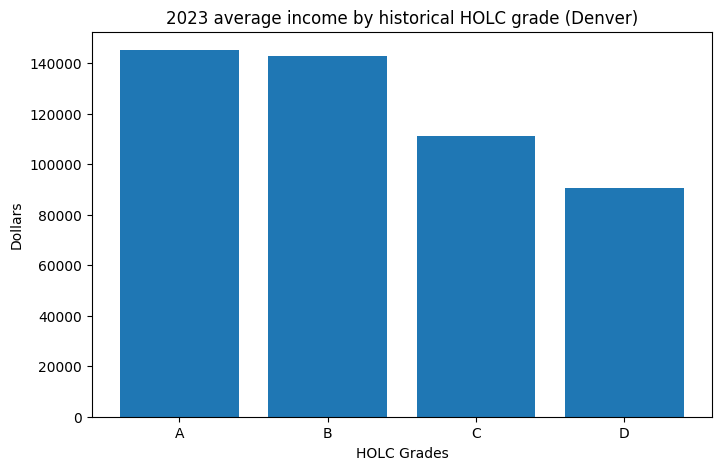

In [64]:
plt.figure(figsize=(8,5))
plt.bar(x=summary.index, height=summary.values)
plt.title("2023 average income by historical HOLC grade (Denver)")
plt.xlabel("HOLC Grades")
plt.ylabel("Dollars")
plt.show()

This graph is probabbly my best visualization. It clearly shows that there is still economic disparity in these historic redlined districts. But I would love to show the user what that realistically looks like on a map today.

To do this I will isolate the redline districts (Grade D) and try to plot the current and old areas. I talked to my TA for the best way to do this and we came up with an idea to keep the heatmap from section 3 while trying to outline the historic redline districts so I can show the average median income in a 2023 district and how much of that district represents a historic redline district

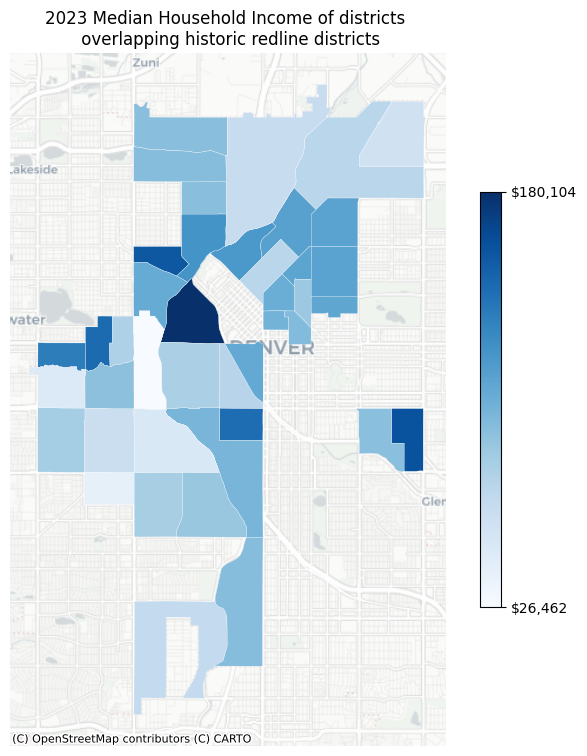

In [65]:
redlined = joined[joined["grade"] == "D"].copy()

min_income_red = redlined["median_income"].min()
max_income_red = redlined["median_income"].max()

fig, ax = plt.subplots(figsize=(9, 9))

redlined.plot(
    column="median_income",
    cmap="Blues",
    legend=True,
    legend_kwds={
        "ticks": [min_income_red, max_income_red],
        "format": '${x:,.0f}',
        "shrink": 0.6
    },
    linewidth=0.2,
    edgecolor="white",
    ax=ax
)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zoom=12)

ax.set_title("2023 Median Household Income of districts \n overlapping historic redline districts")
ax.set_axis_off()
plt.show()


This is good, but we can do better. This just uses a "Blues" color map but I want to make a custom color map using the same values and colors as part 3 and I want to overlay a outline map of the historic redline districts

lets start with the custom color map

In [66]:
# limits for the legend and color map
vmin_all = joined["median_income"].min()
vmax_all = joined["median_income"].max()

vmin_red = redlined["median_income"].min()
vmax_red = redlined["median_income"].max()

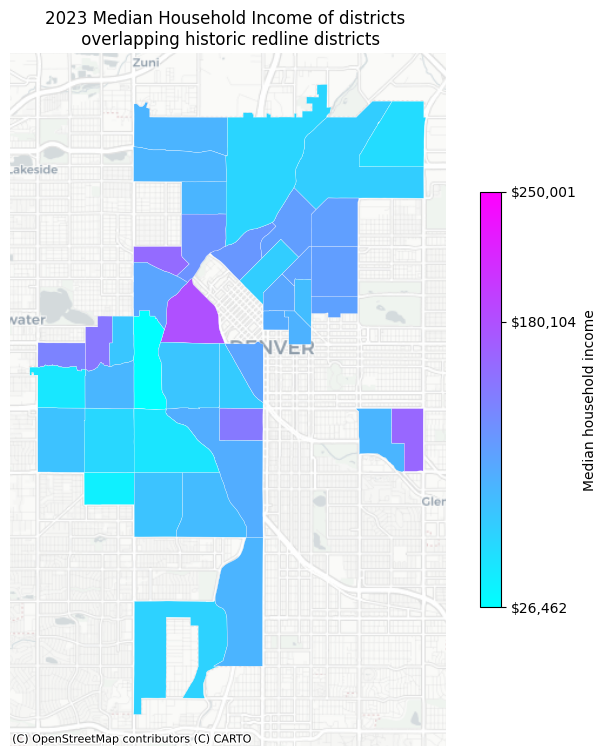

In [67]:
fig, ax = plt.subplots(figsize=(9, 9))

redlined.plot(
    column="median_income",
    cmap="cool",
    legend=True,
    legend_kwds={
        "ticks":[vmax_all,vmax_red,vmin_red],
        "label": "Median household income",
        "format": '${x:,.0f}',
        "shrink": 0.6,
    },
    linewidth=0.2,
    edgecolor="white",
    ax=ax,
    vmax=vmax_all,
    vmin=vmin_all
)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zoom=12)
ax.set_title("2023 Median Household Income of districts \n overlapping historic redline districts")
ax.set_axis_off()
plt.show()


Now all thats left to do is add the OG redline outlines

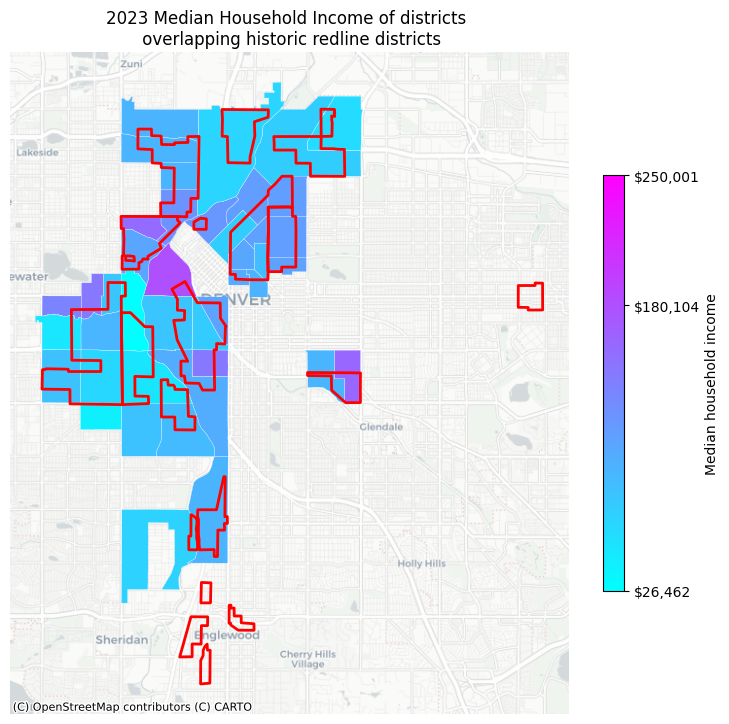

In [68]:
fig, ax = plt.subplots(figsize=(9, 9))

redlined.plot(
    column="median_income",
    cmap="cool",
    legend=True,
    legend_kwds={
        "ticks":[vmax_all,vmax_red,vmin_red],
        "label": "Median household income",
        "format": '${x:,.0f}',
        "shrink": 0.6,
    },
    linewidth=0.2,
    edgecolor="white",
    ax=ax,
    vmax=vmax_all,
    vmin=vmin_all
)

original_redlined = denver_gdf_3857.loc[denver_gdf_3857["grade"]=='D']
original_redlined.plot(
    ax=ax,
    facecolor='none', # makes it an outline
    edgecolor='red',
    linewidth=2,
)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zoom=12)

ax.set_title("2023 Median Household Income of districts \n overlapping historic redline districts")
ax.set_axis_off()
plt.show()

I think this is so sick, especially because you can see that even some of these 2023 districts with higher income, there is actually only a small overlap between that district and the historic district such as the example below

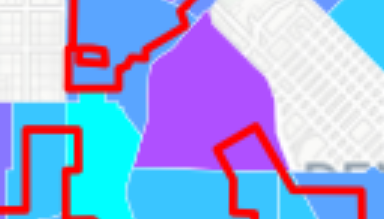

In [69]:
display.Image("./overlap_example.png")

------

Just becaue I am curious I am going to make a visualization of the grade A districts to see how different it is

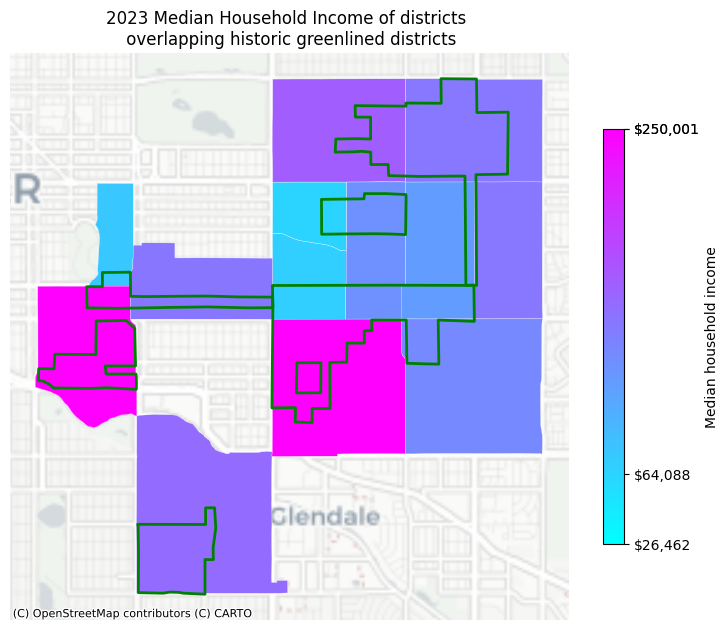

In [70]:
greenlined = redlined = joined[joined["grade"] == "A"].copy()
vmax_green = greenlined["median_income"].max()
vmin_green = greenlined["median_income"].min()

fig, ax = plt.subplots(figsize=(9, 9))

greenlined.plot(
    column="median_income",
    cmap="cool",
    legend=True,
    legend_kwds={
        "ticks":[vmax_all,vmax_green,vmin_green, vmin_all],
        "label": "Median household income",
        "format": '${x:,.0f}',
        "shrink": 0.6,
    },
    linewidth=0.2,
    edgecolor="white",
    ax=ax,
    vmax=vmax_all,
    vmin=vmin_all
)

original_greenlined = denver_gdf_3857.loc[denver_gdf_3857["grade"]=='A']
original_greenlined.plot(
    ax=ax,
    facecolor='none', # makes it an outline
    edgecolor='green',
    linewidth=2,
)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zoom=12)

ax.set_title("2023 Median Household Income of districts \n overlapping historic greenlined districts")
ax.set_axis_off()
plt.show()

This is interesting too because while the A districts do overlap with the most rich districts, there are also less districts, and it looks like a pretty even 50/25/25 split between uber wealthy, middle income, and lower income 2023 districts.